# CREDIT CARD TRANSACTION CLASS CLASSIFICATION

# <p id="1" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #90CDF4; font-size: 16px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">1: Import Libraries</p>





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

import xgboost as xgb
%matplotlib inline

# <p id="2" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #90CDF4; font-size: 16px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">2: Read Dataset</p>


In [2]:
# Load training and testing datasets
df = pd.read_csv("creditcard.csv")


In [3]:
df.shape

(284807, 31)

In [4]:
pd.set_option('display.max_columns',31)

In [5]:
df = df.copy()
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

# <p id="3" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #90CDF4; font-size: 16px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">3: Dataset Overview</p>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    
<b>Inference</b>:<br>
<ul style="list-style-type: square; color: #004085;">
    <li>The dataset contains <b>2,84,807</b> entries.</li>
    <li>Each entry represents a cred card transaction.</li>
    <li>There are <b>31</b> columns in the dataset.</li>
    <li>The columns represent 30 various features </li>
    <li>There is no missing values in any record </li>
    <li>The target variable is '<b>class</b>', which represents the record which is frad.</li>
    <li>The features include only numerical (float64) data types.</li>
</ul>
    
</div>


## Summary Statistics for Numerical Features


In [7]:
df.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.759061e-12      1.958696  -56.407510     -0.920373   
V2      284807.0 -8.251130e-13      1.651309  -72.715728     -0.598550   
V3      284807.0 -9.654937e-13      1.516255  -48.325589     -0.890365   
V4      284807.0  8.321385e-13      1.415869   -5.683171     -0.848640   
V5      284807.0  1.649999e-13      1.380247 -113.743307     -0.691597   
V6      284807.0  4.248366e-13      1.332271  -26.160506     -0.768296   
V7      284807.0 -3.054600e-13      1.237094  -43.557242     -0.554076   
V8      284807.0  8.777971e-14      1.194353  -73.216718     -0.208630   
V9      284807.0 -1.179749e-12      1.098632  -13.434066     -0.643098   
V10     284807.0  7.092545e-13      1.088850  -24.588262     -0.535426   
V11     284807.0  1.874948e-12      1.020713   -4.797473     -0.762494   
V12     284807.0  1.053347e-12      0.999201  -18.683715     -0.405571   
V13     284807.0  7.127611e-13      0.995274   -5.791881     -0.648539   
V14     284807.0 -1.474791e-13      0.958596  -19.214325     -0.425574   
V15     284807.0 -5.231558e-13      0.915316   -4.498945     -0.582884   
V16     284807.0 -2.282250e-13      0.876253  -14.129855     -0.468037   
V17     284807.0 -6.425436e-13      0.849337  -25.162799     -0.483748   
V18     284807.0  4.950748e-13      0.838176   -9.498746     -0.498850   
V19     284807.0  7.057397e-13      0.814041   -7.213527     -0.456299   
V20     284807.0  1.766111e-12      0.770925  -54.497720     -0.211721   
V21     284807.0 -3.405756e-13      0.734524  -34.830382     -0.228395   
V22     284807.0 -5.723197e-13      0.725702  -10.933144     -0.542350   
V23     284807.0 -9.725856e-13      0.624460  -44.807735     -0.161846   
V24     284807.0  1.464150e-12      0.605647   -2.836627     -0.354586   
V25     284807.0 -6.987102e-13      0.521278  -10.295397     -0.317145   
V26     284807.0 -5.617874e-13      0.482227   -2.604551     -0.326984   
V27     284807.0  3.332082e-12      0.403632  -22.565679     -0.070840   
V28     284807.0 -3.518874e-12      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

# <p id="4" style="text-align: center; padding: 20px; background-color: #E8F0FE; border-radius: 10px; border: 2px solid #90CDF4; font-size: 16px; color: #1A202C; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);">4: EDA</p>

<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
    <p><b>Using EDA for Missing Data:</b></p>
    <ul>
        <li>EDA is an effective way to grasp the key characteristics of the dataset and its missing values.</li>
    </ul>
</div>


In [8]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use white grid
sns.set(rc={'axes.facecolor': '#FFF2CC'}, style='whitegrid')


###  Numerical Features Univariate Analysis


In [9]:
#as all the column are numberical we will include all of them in continuous feature
continuous_features = df.columns

In [10]:
continuous_features


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
df_continuous = df[continuous_features]

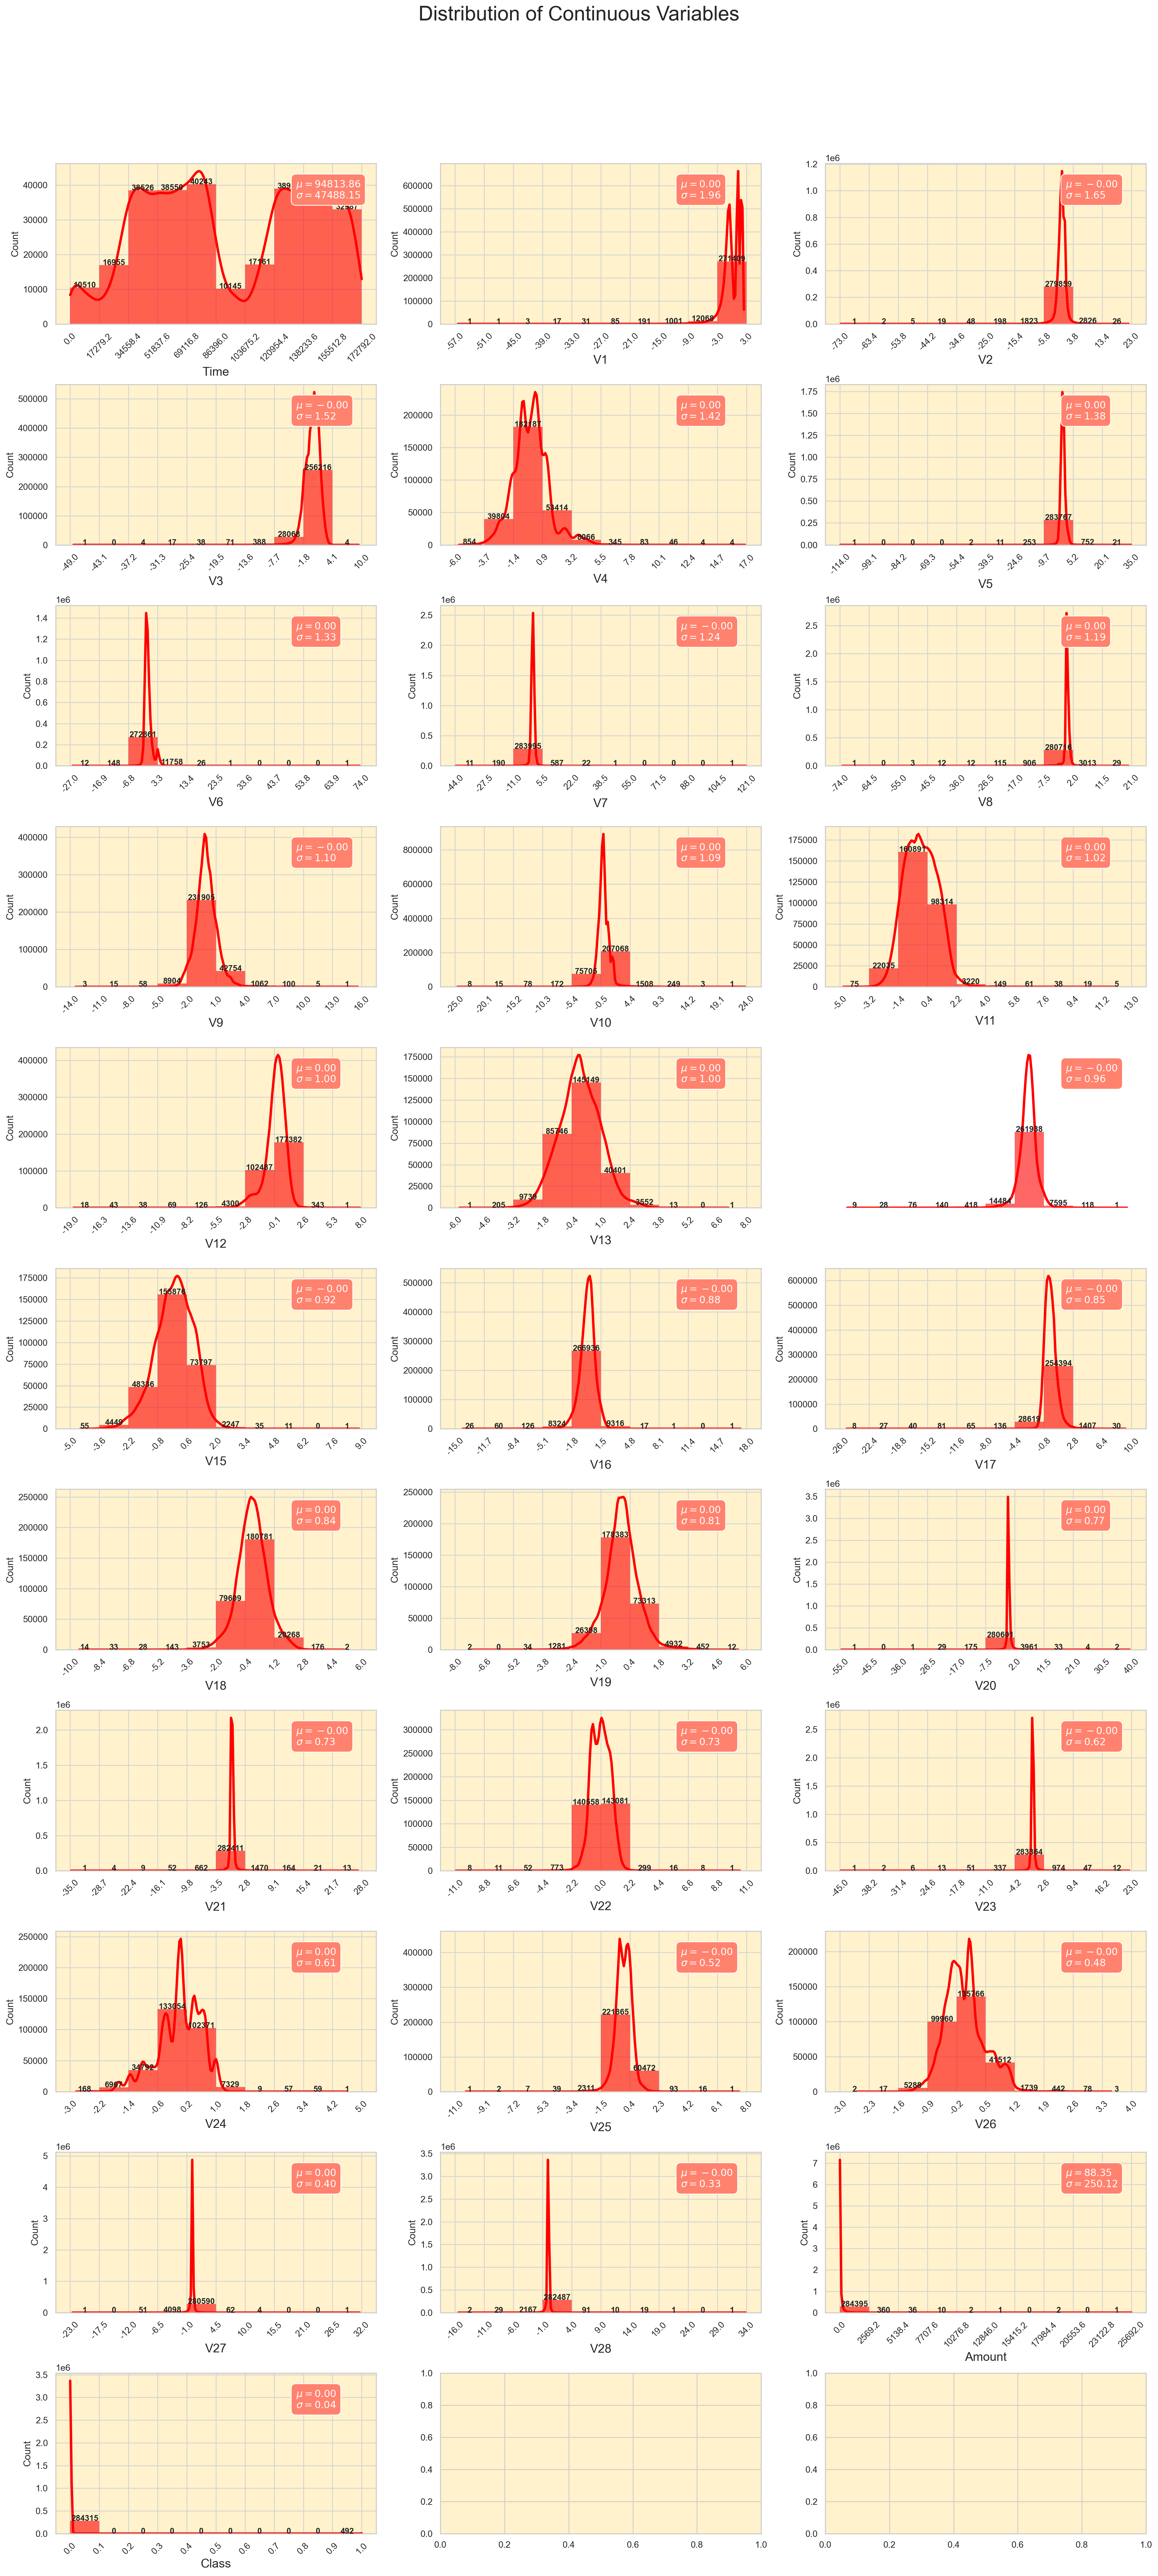

In [17]:
# Set up the subplot
fig, ax = plt.subplots(nrows=11, ncols=3, figsize=(20, 45))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[4,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

##  Bivariate Analysis


### Numerical Features vs Target (loan_status)


In [12]:
df_continuous = df[continuous_features]

In [27]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(20,200), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="Class", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["Class"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Not fraud')
    sns.kdeplot(data=df[df["Class"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='Fraud')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Fraud Status', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [13]:
corr_matrix = df.corr()


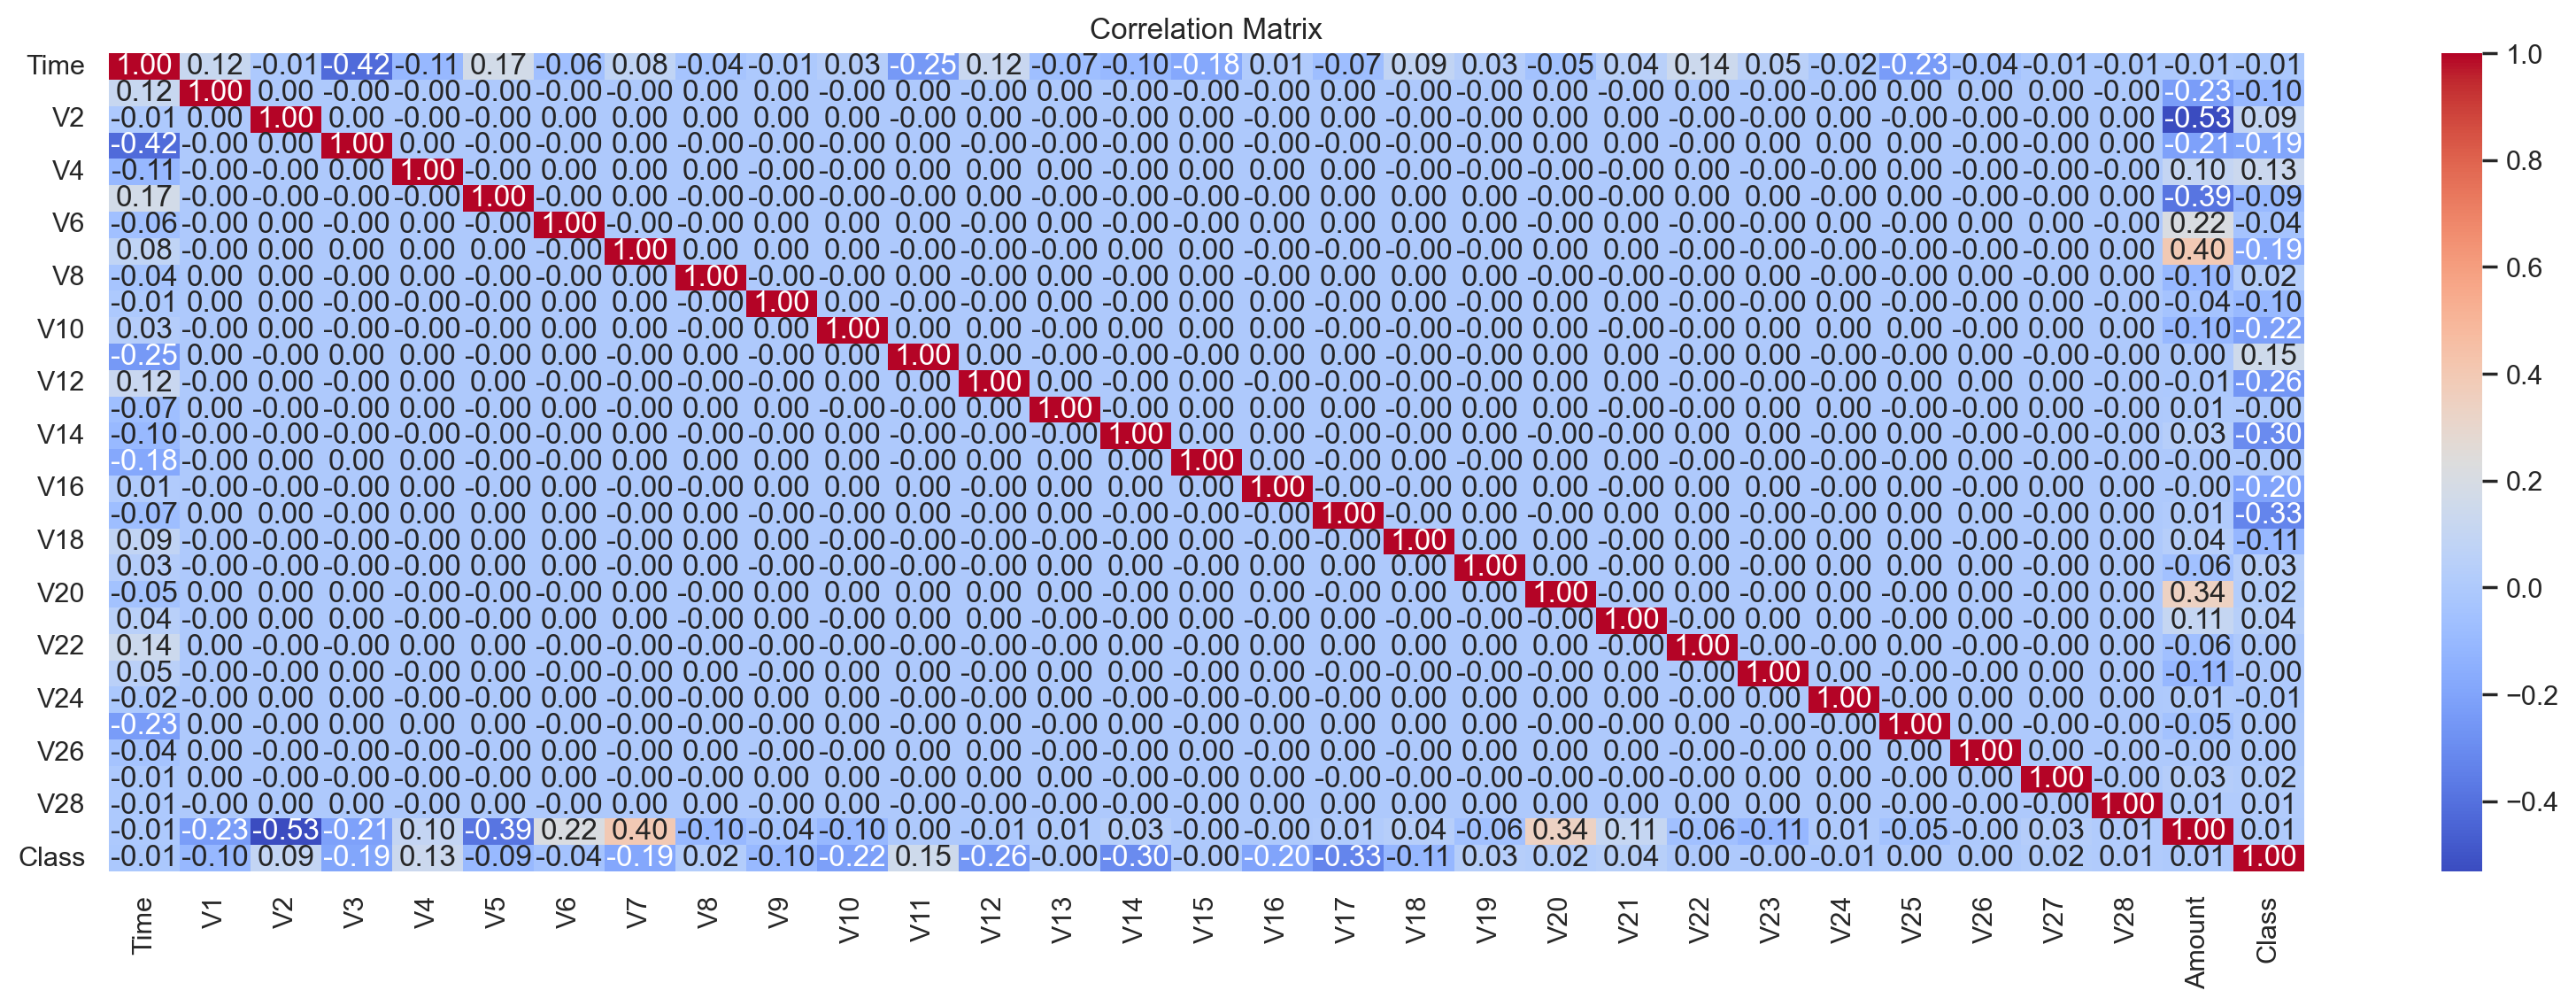

In [14]:
plt.figure(figsize=(20, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Outlier Treatment


In [15]:
continuous_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
Outliers_count_specified = (((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum())/len(df)

print("Outlier Ratio's Data:\n",Outliers_count_specified)

Outlier Ratio's Data:
 Time      0.000000
V1        0.024796
V2        0.047492
V3        0.011808
V4        0.039142
V5        0.043170
V6        0.080634
V7        0.031418
V8        0.084738
V9        0.029083
V10       0.033342
V11       0.002739
V12       0.053889
V13       0.011826
V14       0.049679
V15       0.010161
V16       0.028735
V17       0.026053
V18       0.026449
V19       0.035831
V20       0.097505
V21       0.050901
V22       0.004624
V23       0.065100
V24       0.016762
V25       0.018844
V26       0.019648
V27       0.137507
V28       0.106535
Amount    0.112020
Class     0.001727
dtype: float64


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <p><strong>Outlier Ratios Comparison:</strong></p>
    <p>Comparing the outlier ratios between the train and test datasets, we can see that they are generally similar for most features. This suggests that the outlier counts are balanced relative to the number of rows in both datasets.</p>
</div>


<div style="background-color: #f0cccc; padding: 10px 12px; border: 2px solid #cc0000; border-radius: 10px;">
     <h3>📝 Sensitivity to Outliers:</h3>
<br>
For model evaluations, we are going to use Tree Based Models:<br>
    <b>Decision Trees (DT) and Random Forests (RF)</b>, these tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.<br>
    <b>AdaBoost</b>: This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.
    
<p>To overcome this we'll focus on applying transformations like <b>Box-Cox</b> in the subsequent steps to reduce the impact of outliers and make the data more suitable for modeling.</p>
</div>


## Duplicate Data


In [18]:
df.drop_duplicates(inplace=True)

##  Check Imbalanced Data


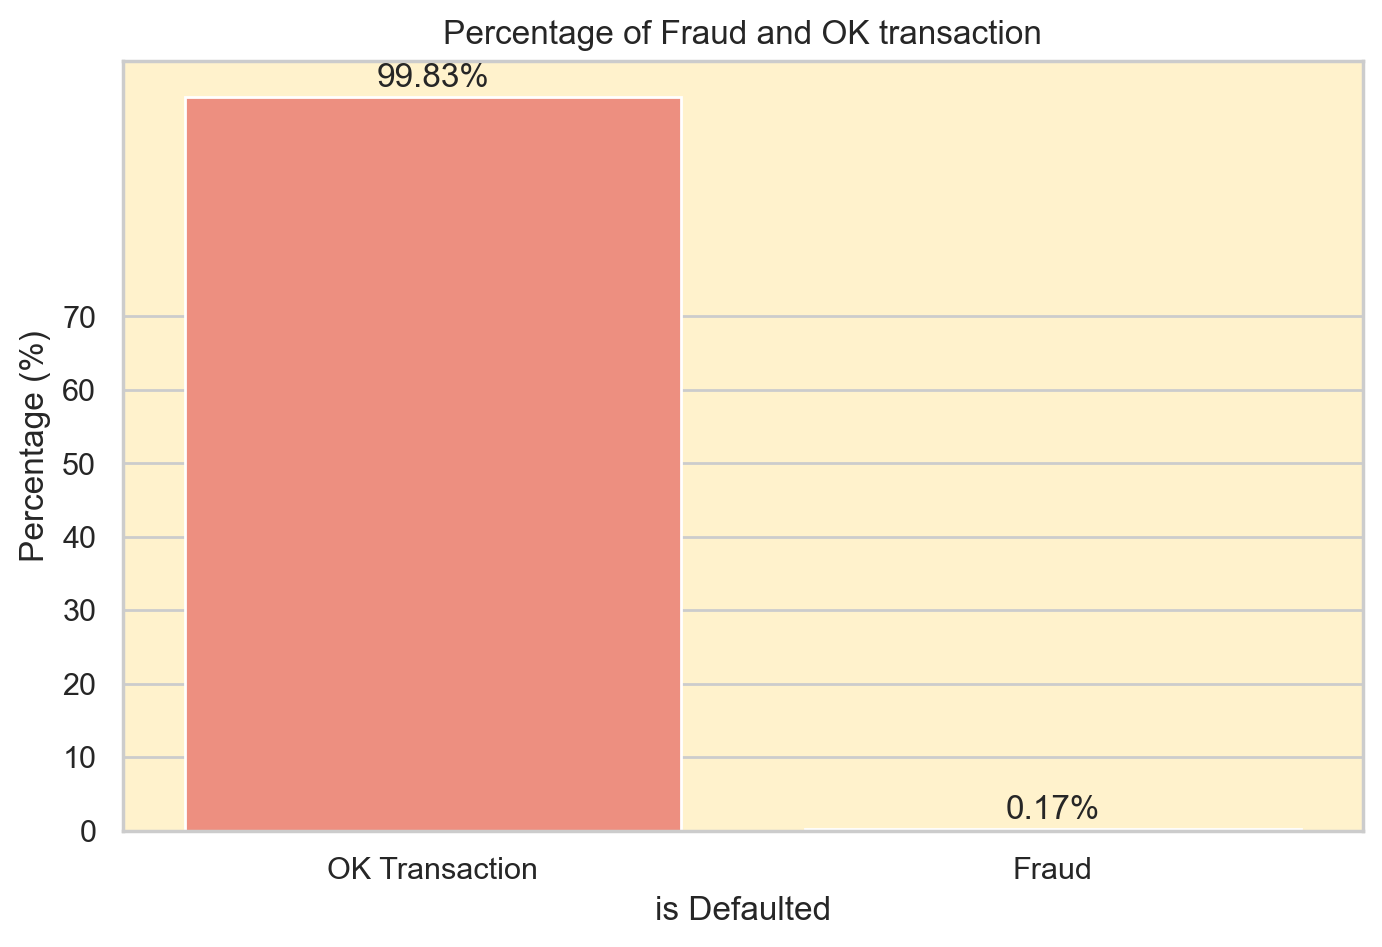

In [19]:
# Calculating the percentage of each class
percentage = df['Class'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['#ff826e', 'red'])
plt.title('Percentage of Fraud and OK transaction')
plt.xlabel('is Defaulted')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['OK Transaction','Fraud'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    The bar plot shows the percentage of fraud and ok transaction in the dataset. Approximately 99.83% of the loan status was paid, and 0.17% were defaulted. This indicates that there is high imbalance in the target variable.
    To address this, we will use <b>SMOTE (Synthetic Minority Over-sampling Technique)</b>. SMOTE is a technique used to generate synthetic samples for the minority class in order to balance the class distribution in the dataset. By creating synthetic samples, SMOTE helps mitigate the impact of class imbalance and improves the performance of machine learning models in predicting the minority class.
</div>

### Handling Unbalanced


In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('Class', axis=1), df['Class'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

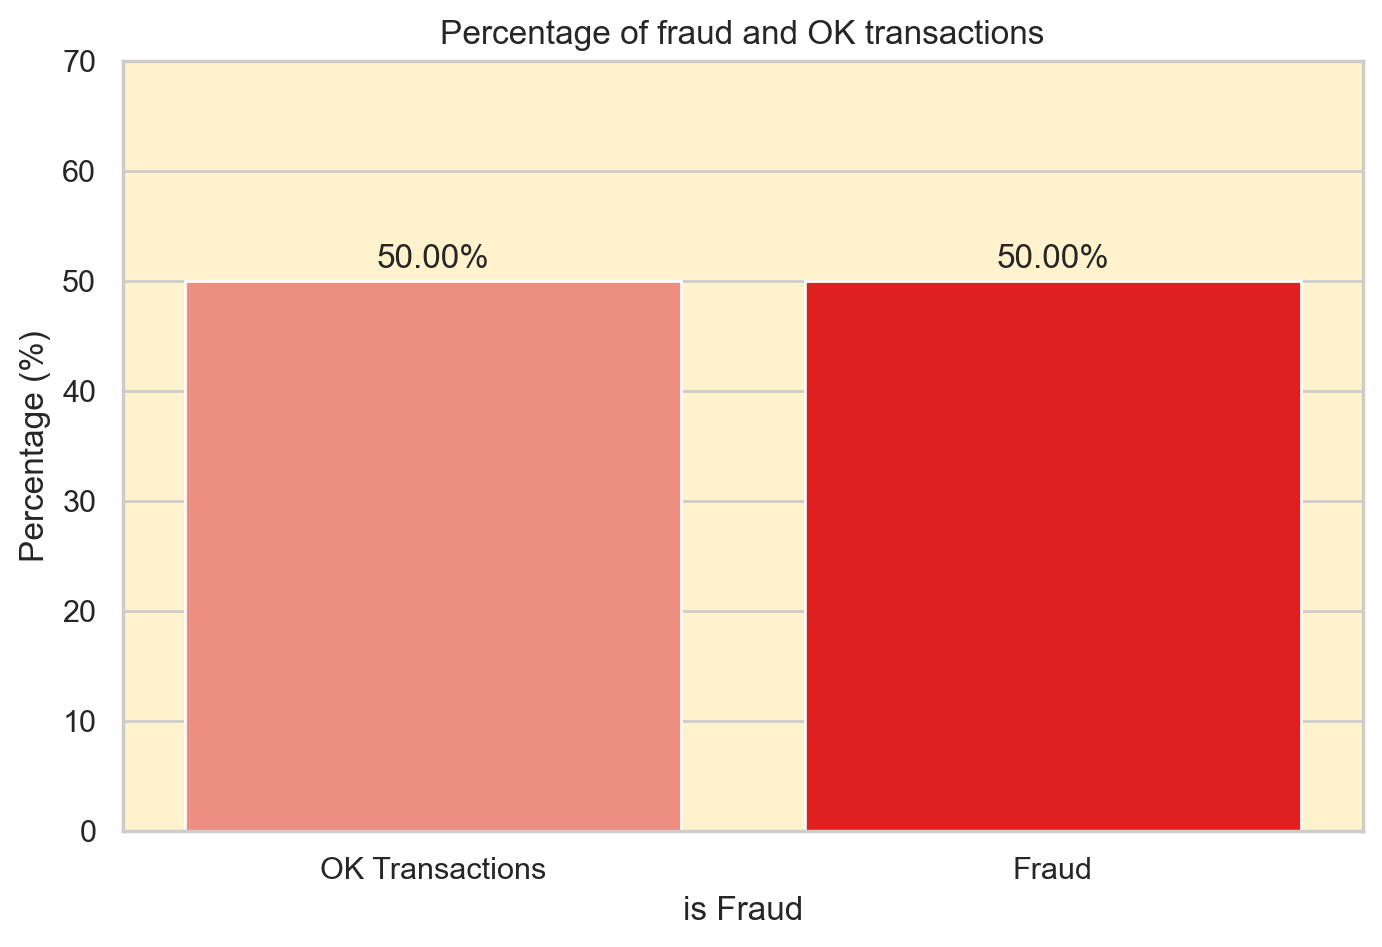

In [21]:
# Calculating the percentage of each class
percentage = oversampled['Class'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['#ff826e', 'red'])
plt.title('Percentage of fraud and OK transactions')
plt.xlabel('is Fraud')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['OK Transactions','Fraud'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

# Business Requirement


<div style="background-color: #FFCCCC; padding: 10px 12px; border-radius: 10px;border: 2px solid #cc0000;">
    <h2>📝 Note:</h2>
    In the context of fraud transaction prediction:<br>
    <ul>
    <li><b>Prioritize High Recall (Sensitivity) for fraud Transaction</b>: Emphasize identifying most of the actual fraud transactions correctly, even if it leads to some false positives (okay transactions being misclassified as fraud). It's crucial to capture as many true fraud cases as possible to mitigate financial risks and take necessary actions.</li>
    <li><b>Minimize False Negatives (FN)</b>: Aim to reduce instances where fraud transactions are missed by the model. Missing fraud transactions could result in financial losses and impact the overall portfolio performance.</li>
    <li><b>Balance Precision and Recall (F1-score)</b>: While minimizing false positives is important to avoid unnecessary interventions or restrictions on credit access, prioritize achieving high recall to ensure fraud transactions are not overlooked by the model.<b>the F1-score for the 'fraud' class (1) would be the most important metric for evaluating models in this project</b>.</li>
    </ul><br>
    By focusing on these aspects, the fraud transaction prediction model can effectively identify transactions at risk of fraud, enabling proactive measures to mitigate potential losses and maintain a healthy credit transaction.<br>
</div>


# Spliting Training Dataset 


In [22]:
X = oversampled.drop(['Class'], axis=1)
y = oversampled['Class']

In [23]:
# Split the labeled training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=143)

# Decision Tree Model Building


In [26]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

## DT Hyperparameter Tuning


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
I will create a function to identify the best set of hyperparameters that maximize the F1-score for class 1 (defaulted). This method provides a reusable framework for hyperparameter tuning for other models as well
</div>

In [27]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest F1-score for class 1 (defaulted) is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [28]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [23, 24, 25, 26],
    'min_samples_split': [2, 3, 4],  
    'min_samples_leaf': [1, 2, 3], 
  
}


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [23, 24, 25, 26],
    'min_samples_split': [2, 3, 4],  
    'min_samples_leaf': [1, 2, 3],  
    'class_weight': [{0: 1, 1: w} for w in range(1, 6)]
}

# Instantiate the base model
dt_base = DecisionTreeClassifier()

# Set up the RandomizedSearchCV with fewer iterations and folds
random_search = RandomizedSearchCV(
    estimator=dt_base,
    param_distributions=param_grid_dt,
    n_iter=20,  # Reduced number of parameter settings sampled
    scoring='f1',  # Scoring based on F1 score
    cv=3,  # Reduced number of cross-validation folds
    verbose=1,
    n_jobs=-1,  # Use all available CPUs
    random_state=42
)



In [30]:
X_train_subset = X_train.sample(frac=0.1, random_state=42)
y_train_subset = y_train.loc[X_train_subset.index]


In [31]:
# Fit the random search model on the subset
random_search.fit(X_train_subset, y_train_subset)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 2},
                                                         {0: 1, 1: 3},
                                                         {0: 1, 1: 4},
                                                         {0: 1, 1: 5}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [23, 24, 25, 26],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4]},
                   random_state=42, scoring='f1', verbose=1)

In [32]:
# Get the best estimator and parameters
best_dt = random_search.best_estimator_
best_dt_hyperparams = random_search.best_params_

print("Best Hyperparameters:", best_dt_hyperparams)

Best Hyperparameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 25, 'criterion': 'entropy', 'class_weight': {0: 1, 1: 4}}


In [33]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 25, 'criterion': 'entropy', 'class_weight': {0: 1, 1: 4}}


##  DT Model Evaluation


<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">To streamline the evaluation of different models, we will define a set of functions that compute key performance metrics. This approach will ensure consistency in how we assess each model and facilitate comparisons between them</div>

In [34]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [35]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for validation test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    198408
           1       0.99      0.99      0.99    198146

    accuracy                           0.99    396554
   macro avg       0.99      0.99      0.99    396554
weighted avg       0.99      0.99      0.99    396554


	   Classification report for validation test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     84845
           1       0.99      0.99      0.99     85107

    accuracy                           0.99    169952
   macro avg       0.99      0.99      0.99    169952
weighted avg       0.99      0.99      0.99    169952



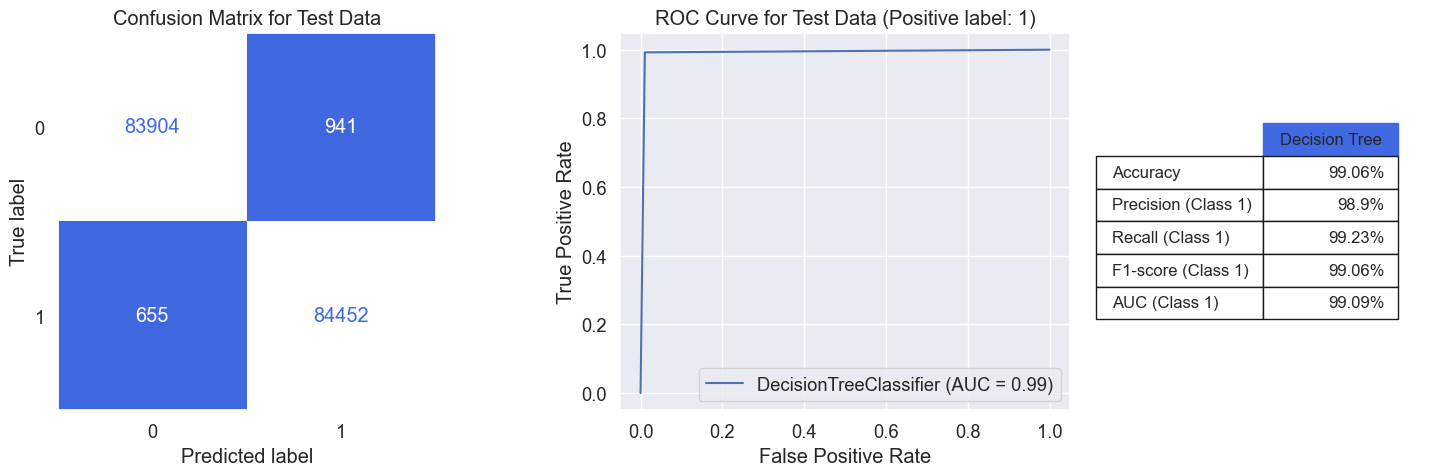

In [36]:
model_evaluation(best_dt, X_train, X_val, y_train, y_val, 'Decision Tree')

In [37]:
# Save the final performance of DT classifier
dt_result = metrics_calculator(best_dt, X_val, y_val, 'Decision Tree')
dt_result

Decision Tree
Accuracy                   99.06%
Precision (Class 1)         98.9%
Recall (Class 1)           99.23%
F1-score (Class 1)         99.06%
AUC (Class 1)              99.09%

<div style="background-color: #fafafa; padding: 20px; border-left: 4px solid #5e72e4; border-radius: 8px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.05);">
    <h3>Decision Tree Model Evaluation (Fraud Transaction Domain)</h3>
    <table style="width:100%">
        <tr>
            <th>Metric</th>
            <th>Value</th>
            <th>Interpretation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>99.06%</td>
            <td>The model correctly predicted transaction class for 99.06% of the cases.</td>
        </tr>
        <tr>
            <td>Precision (Fraud)</td>
            <td>98.90%</td>
            <td>Out of all transaction predicted as Fraud, only 98.90% were actually fraud transaction.</td>
        </tr>
        <tr>
            <td>Recall (Fraud)</td>
            <td>99.23%</td>
            <td>The model identified 99.23% of the actual fraud transactions.</td>
        </tr>
        <tr>
            <td>F1-score (Fraud)</td>
            <td>99.06%</td>
            <td>The harmonic mean of precision and recall for fraud transactions is 99.06%.</td>
        </tr>
        <tr>
            <td>AUC (Defaulted)</td>
            <td>99.09%</td>
            <td>The Area Under the ROC Curve (AUC) for fraud transactions is 99.09%, indicating the model's ability to rank transactions to be fraud than non-fraud ones.</td>
        </tr>
    </table>
    <p>The evaluation of the Decision Tree model in the loan domain reveals its performance in predicting defaulted loans. While it achieved an accuracy of 99.06%, indicating overall correctness, the precision, recall, and F1-score for defaulted loans suggest room for improvement in identifying actual defaulted cases. The AUC score further validates the model's discriminative power in distinguishing fraud transaction from okay transactions.</p>

</div>
